# Afrobeats Recommender

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import time

## Import dataframe

In [31]:
df = pd.read_csv('../data/features.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.544,0.730,1,-4.299,0,0.1440,0.34400,0.000001,0.1400,0.7510,162.112,afrobeats
1,0.793,0.734,11,-9.252,0,0.0981,0.32300,0.000002,0.7770,0.7930,125.032,afrobeats
2,0.879,0.737,2,-5.412,1,0.0421,0.52500,0.005760,0.2680,0.9670,119.990,afrobeats
3,0.697,0.841,2,-6.782,1,0.2710,0.22400,0.000000,0.3360,0.8080,103.070,afrobeats
4,0.520,0.717,6,-3.006,0,0.3890,0.11600,0.000000,0.2490,0.7040,135.550,afrobeats
...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.701,0.824,10,-7.164,0,0.0624,0.00932,0.038900,0.1330,0.7840,124.053,random
186,0.514,0.365,2,-12.077,1,0.0370,0.59900,0.000042,0.1340,0.0945,177.601,random
187,0.581,0.466,0,-12.281,1,0.0324,0.23100,0.000000,0.2160,0.6810,167.771,random
188,0.735,0.324,2,-14.010,1,0.0439,0.01230,0.000099,0.0986,0.1500,83.919,random


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      190 non-null    float64
 1   energy            190 non-null    float64
 2   key               190 non-null    int64  
 3   loudness          190 non-null    float64
 4   mode              190 non-null    int64  
 5   speechiness       190 non-null    float64
 6   acousticness      190 non-null    float64
 7   instrumentalness  190 non-null    float64
 8   liveness          190 non-null    float64
 9   valence           190 non-null    float64
 10  tempo             190 non-null    float64
 11  genre             190 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 17.9+ KB


In [36]:
df.shape

(190, 12)

In [ ]:
features = ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

Perform some EDA on the features

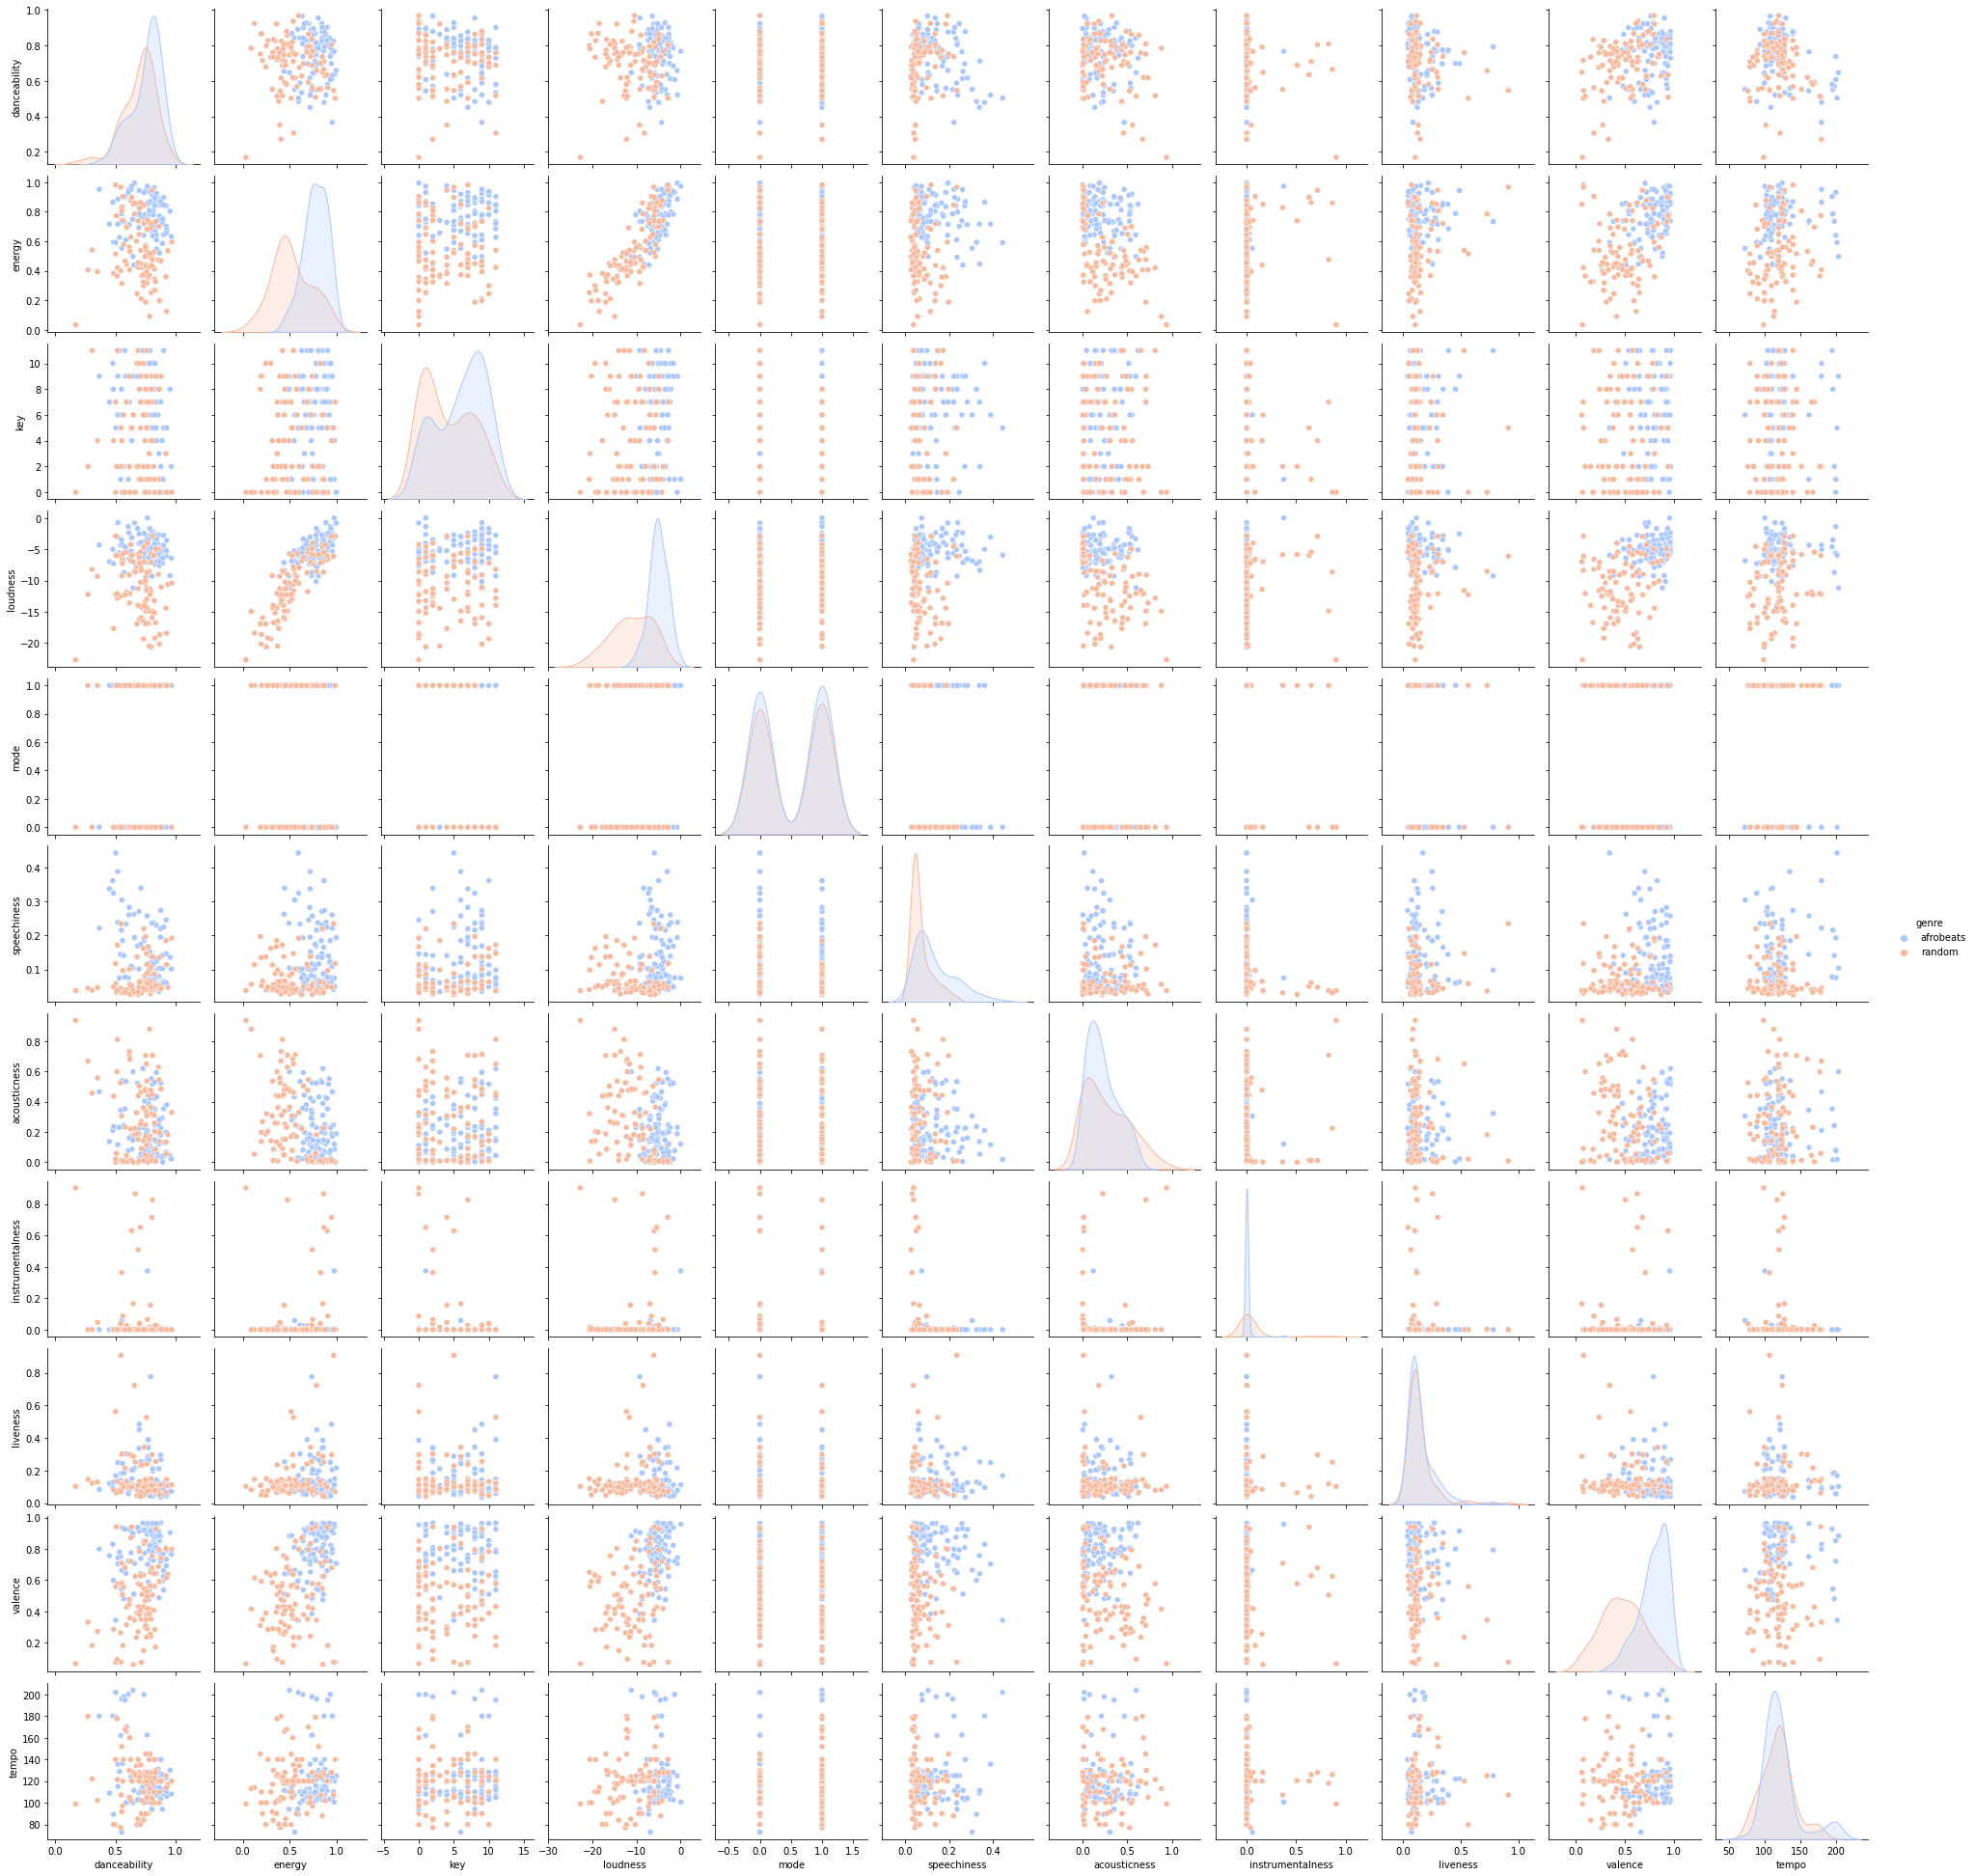

In [35]:
sns.pairplot(df, hue='genre', palette='coolwarm');

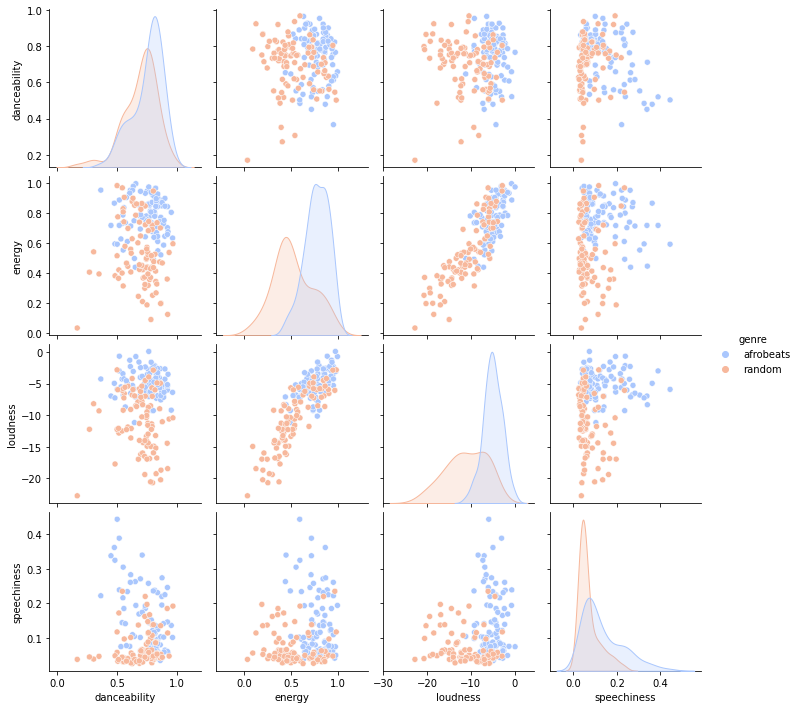

In [39]:
sns.pairplot(df[['danceability', 'energy','loudness','speechiness','genre']], hue='genre', palette='coolwarm');

#### Quick clustering to see how the different genres seperate out 

In [ ]:
X = df.drop(columns = ['genre'])

In [57]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=2))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

In [62]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,cluster
0,0.544,0.730,1,-4.299,0,0.1440,0.34400,0.000001,0.1400,0.7510,162.112,afrobeats,0
1,0.793,0.734,11,-9.252,0,0.0981,0.32300,0.000002,0.7770,0.7930,125.032,afrobeats,0
2,0.879,0.737,2,-5.412,1,0.0421,0.52500,0.005760,0.2680,0.9670,119.990,afrobeats,0
3,0.697,0.841,2,-6.782,1,0.2710,0.22400,0.000000,0.3360,0.8080,103.070,afrobeats,0
4,0.520,0.717,6,-3.006,0,0.3890,0.11600,0.000000,0.2490,0.7040,135.550,afrobeats,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.701,0.824,10,-7.164,0,0.0624,0.00932,0.038900,0.1330,0.7840,124.053,random,0
186,0.514,0.365,2,-12.077,1,0.0370,0.59900,0.000042,0.1340,0.0945,177.601,random,1
187,0.581,0.466,0,-12.281,1,0.0324,0.23100,0.000000,0.2160,0.6810,167.771,random,1
188,0.735,0.324,2,-14.010,1,0.0439,0.01230,0.000099,0.0986,0.1500,83.919,random,1


#### Checking the accuracy

In [67]:
label = df['genre'].map({'afrobeats':0,'random':1})

In [68]:
label

0      0
1      0
2      0
3      0
4      0
      ..
185    1
186    1
187    1
188    1
189    1
Name: genre, Length: 190, dtype: int64

In [69]:
df[df['genre']=='afrobeats']['cluster'].sum()

1

In [70]:
df[df['genre']=='random']['cluster'].sum()

60

#### Setup X and y

In [113]:
X = df.drop(columns=['genre'])
y = df['genre']

In [115]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)


In [116]:
# Fit a K-means clustering model
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=2, random_state=42)

In [118]:
km.predict(X_ss)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int32)